## Situation 5
### Mean noise level miu unknown,  Rotation angle theta, A unknown, sigma_square is unknown
### Estimate the center position (m0, n0),  sigma_square, A，miu and rotation angel theta
 

In [1]:
# Fixed Parameters
M = 100
N = 68

L1 = 20
L2 = 12

In [2]:
# Import Library
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Plot the image for estimation

In [3]:
miu = 0.2
A = 1
sigma = 0.54772 #sigma_square=0.3
# Set the center position of the box, plot the image we need for estimation
m0 = 50
n0 = 38
# Rotation Angel theta
theta = np.pi/3
R_mat = [[np.cos(theta),-1*np.sin(theta)],
         [np.sin(theta),np.cos(theta)]]

Text(0.5,1,'Generated Image Sample With Rotation')

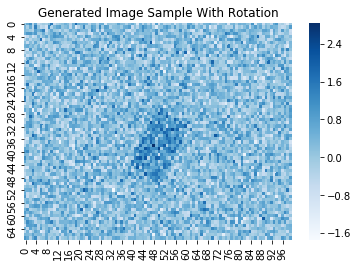

In [4]:
background = sigma * np.random.randn(N,M) + miu
object_a = np.zeros([N,M])
for i in range (N):
    for j in range (M):
        if abs(i-n0)<=(L2/2) and abs(j-m0)<=(L1/2):
            #p_1 = [j, 68-i]
            #p_c = [m0, 68-n0]
            vector = [j-m0, n0-i]
            [vt1, vt2]= np.matmul(R_mat,vector)
            [q,p] = [vt1 + m0, (vt2 + 68 - n0)]
            [q,p] = np.int32(np.round([q,p]))
            #print([q,p])
            object_a[68-p][q]=1
image_1 = background+A*object_a
sns.heatmap(image_1,cmap="Blues")
plt.title("Generated Image Sample With Rotation")

In [5]:
"""""""""
Do Gird Search for theta, 
First, Caculate matrix H (MN*2). 
Second, Caculate the estimated Theta(A and miu) .
Last, Do Grid Search to maximize (X-H*Theta)T(X-H*Theta)

"""""""""
X_image = np.transpose(np.matrix(image_1).flatten('F'))  
sum_results_5 = []
sum_index_5 = []
for r in np.arange(0.0, 0.5, 0.01):
    beta = r*np.pi
    R_mat = [[np.cos(beta),-1*np.sin(beta)],
            [np.sin(beta),np.cos(beta)]]
    for n0_hat in range(int(L2/2-1),int(N-L2/2)):
        for m0_hat in range(int(L1/2-1),int(M-L1/2)):
            object_sim = np.zeros((N,M))
            for i in range(N):
                for j in range(M):
                    if abs(i-n0_hat)<=(L2/2) and abs(j-m0_hat)<=(L1/2):
                                vector = [j-m0_hat, n0_hat-i]
                                [vt1, vt2]= np.matmul(R_mat,vector)
                                [q,p] = [vt1 + m0_hat, (vt2 + 68 - n0_hat)]
                                [q,p] = np.int32(np.round([q,p]))
                                pp = np.clip((68-p),-67, 67)
                                q = np.clip(q,-99,99)
                                object_sim[pp][q]=1
            g = np.transpose(np.matrix(object_sim).flatten('F'))            
            I = np.transpose(np.matrix(np.ones([M,N])).flatten('F')) 
            H = np.concatenate((g,I), axis=1)
            Theta = np.linalg.inv(np.transpose(H)*H)*np.transpose(H)*X_image
            square_err = np.transpose(X_image - H*Theta)*(X_image - H*Theta)
            sum_results_5.append(square_err)
            sum_index_5.append([n0_hat, m0_hat, beta])

In [6]:
[n0_est,m0_est,beta_est] = sum_index_5[np.argmin(sum_results_5)]
rotation_angel = beta_est/(np.pi)
print(rotation_angel)
print("The estimated center position is: ", [n0_est,m0_est])
print("The estimated rotation angel is:", rotation_angel,"pi")

0.33
The estimated center position is:  [38, 50]
The estimated rotation angel is: 0.33 pi


In [7]:
sigma_square_est = min(sum_results_5)/(M*N)
sigma_est = np.sqrt(sigma_square_est)
print(" The Estimated sigma square is: ", sigma_square_est)

 The Estimated sigma square is:  [[0.29742732]]


In [8]:
# object_sim = np.zeros((N,M))
beta_est = rotation_angel*np.pi
R_mat_est = [[np.cos(beta_est),-1*np.sin(beta_est)],
            [np.sin(beta_est),np.cos(beta_est)]]
for i in range(N):
    for j in range(M):
        if abs(i-n0_est)<=(L2/2) and abs(j-m0_est)<=(L1/2):      
                vector = [j-m0_est, n0_est-i]
                [vt1, vt2]= np.matmul(R_mat_est,vector)
                [q,p] = [vt1 + m0_est, (vt2 + 68 - n0_est)]
                [q,p] = np.int32(np.round([q,p]))
                pp = np.clip((68-p),-67, 67)
                q = np.clip(q,-99,99)
                object_sim[pp][q]=1
g = np.transpose(np.matrix(object_sim).flatten('F'))            
I = np.transpose(np.matrix(np.ones([M,N])).flatten('F')) 
H = np.concatenate((g,I), axis=1)
Theta_est = np.linalg.inv(np.transpose(H)*H)*np.transpose(H)*X_image
A_est = Theta_est[0]
miu_est = Theta_est[1]
print(" The Estimated A is: ", A_est)
print(" The Estimated miu is: ", miu_est)

 The Estimated A is:  [[0.47609538]]
 The Estimated miu is:  [[0.19736403]]


Text(0.5,1,'New Generated Image Sample With Rotation Using Estimated Parameters')

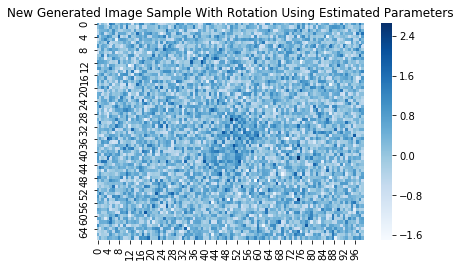

In [9]:
R_mat_est = [[np.cos(beta_est),-1*np.sin(beta_est)],
         [np.sin(beta_est),np.cos(beta_est)]]
background_est = np.asscalar(sigma_est) * np.random.randn(N,M) + np.asscalar(miu_est)
object_a_est = np.zeros([N,M])
for i in range (N):
    for j in range (M):
        if abs(i-n0_est)<=(L2/2) and abs(j-m0_est)<=(L1/2):
            #p_1 = [j, 68-i]
            #p_c = [m0, 68-n0]
            vector = [j-m0_est, n0_est-i]
            [vt1, vt2]= np.matmul(R_mat_est,vector)
            [q,p] = [vt1 + m0_est, (vt2 + 68 - n0_est)]
            [q,p] = np.int32(np.round([q,p]))
            #print([q,p])
            object_a_est[68-p][q]=1
image_1_est = background_est+np.asscalar(A_est)*object_a_est
sns.heatmap(image_1_est,cmap="Blues")
plt.title("New Generated Image Sample With Rotation Using Estimated Parameters")

Text(0.5,1,'Difference Between Real and Estimated')

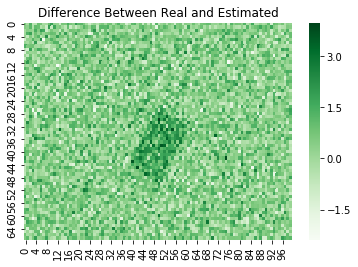

In [10]:
diff = image_1+image_1_est
sns.heatmap(diff,cmap="Greens")
plt.title("Difference Between Real and Estimated")